In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

## Setting max displayed rows to 500, in order to display the full output of any command
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#pip freeze | grep sci

In [3]:
#pip install -U scikit-learn

In [4]:
#test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [5]:
data = train_data.copy()

# Data exploration

## Feuille de route

- Séparer les X et les y
- Séparer les catégorielles et les quantitatives
    - Sur les catégorielles : regarder le nombre de valeurs uniques pour savoir si / comment encoder
    - Sur les numériques : regarder les 

	1. Examiner la structure des données :
		○ Data.info() ==> taille du dataset + types de données + nb de données non nulles 
		○ Colonne.value_counts() ==> liste des modalités pour savoir si catégoriel ou non. Permet aussi d'identifier les écarts de poids entre les classes (imbalanced classes)
		○ Valeurs numériques : 
			§ Describe :
				□ Dispersion 
				□ Ordres de grandeur
				
			§ Hisplot :
				□ Distribution (symétrique ? Outliers ? Bornes min/max ?)
	
	2. Corrélations :
		○ Nombres : utile mais permet seulement de voir relations LINEAIRES
		○ A compléter par des graphiques pour identifer les relations non linéaires (pairplot ou scattermatrix). Sélectionne malgré tout les plus corrélées pour faire ces graphiques (p58)
		
	3. Expérimenter avec des combinaisons de variables :
		○ Par exemple au lieu de prendre le nombre de chambres et le nombre de pièces prendre le nombre de chambres par pièce. Ou bien au lieu de prendre le nombre de pièces dans un quartier, connaitre le nombre de pièces par logement (p60).
		○ Fonctionnement : créer de nouvelles colonnes, puis y mettre ces calculs : 
		housing["bedrooms_per_room"] = housing["tot_bedroom"] / housing["tot_room"] 
		○ Puis refaire une matrice de corrélation avec ces features


## Structure des données
**Objectif** : avoir une idée des transformations à faire sur les données selon les colonnes (numériques : logs ? combinaisons ? passage au carré ? // catégorielles : one-hot ? ordinal ? // toutes : classes, catégories différentes ?), identifier les outliers, identifier les valeurs nulles et avoir une idée de ce qu'il faudra en faire, identifier et supprimer les duplicates.
- Ordres de grandeur numériques
- Outliers
- Formes des distributions
- Nombre de modalités pour les catégorielles (limiter les dimensions à 10% du nombre de lignes)
- Duplicates
- Valeurs nulles


### Séparation des variables numériques et catégorielles

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data["MSSubClass"] = data["MSSubClass"].astype(dtype="object")

In [9]:
X = data.drop(["Id", "SalePrice"], axis=1)

In [10]:
y = data["SalePrice"]

In [11]:
print(data.shape)
print(X.shape)
print(y.shape)

(1460, 81)
(1460, 79)
(1460,)


### Target

#### Analyse

In [12]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

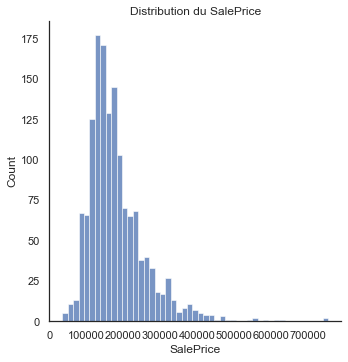

In [13]:
sns.displot(data=data, x="SalePrice").set(title="Distribution du SalePrice")

181K dollars de prix moyen, avec une médiane à 163K dollars.
Distribution asymétrique vers la gauche (davantage de maison vendues peu cher) et avec une longue queue à droite ==> quelques biens se sont vendus très cher. Tant que ces valeurs extrêmes s'expliquent par les features, ce n'est pas nécessaire de les enlever

#### Conclusions
Distribution asymétrique ==> passer en log

### Variables catégorielles

#### Analyse

In [14]:
# identifie les variables catégorielles
cat_features = X.select_dtypes(include=["object"
                                        ])  # DF des variables catégorielles
cat_cols = cat_features.columns  # liste des colonnes catégorielles

<AxesSubplot:>

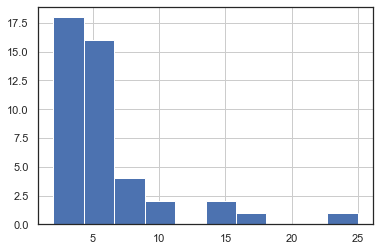

In [15]:
# identifier la distribution des colonnes catégorielles en fonction du nombre de leurs modalités
cat_features.nunique().hist()

In [16]:
# identifier données pour lesquelles on a beaucoup de modalités
cat_features.nunique()[cat_features.nunique() > 5].sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
MSSubClass       15
SaleType          9
Condition1        9
RoofMatl          8
HouseStyle        8
Condition2        8
Functional        7
Heating           6
BsmtFinType2      6
BsmtFinType1      6
Foundation        6
RoofStyle         6
GarageType        6
SaleCondition     6
dtype: int64

In [17]:
# Super fonction de Mickaël pour visualiser les caractéristiques du DF
def df_info(df):
    len_df = len(df)
    all_columns = len(df.columns)
    all_nan = df.isna().sum().sum()

    print(f"""
        Longueur du dataset : {len_df} enregistrements
        Nombre de colonnes : {all_columns}
        """)

    echantillonColonnes = []
    for i in df.columns:
        listcolumn = str(list(df[i].head(5)))
        echantillonColonnes.append(listcolumn)

    obs = pd.DataFrame({
        'type':
        list(df.dtypes),
        'Echantillon':
        echantillonColonnes,
        "% de valeurs nulles":
        round(df.isna().sum() / len_df * 100, 2),
        'Nbr L dupliquées': (df.duplicated()).sum(),
        'Nbr V unique':
        df.nunique()
    })
    return obs

In [18]:
df_info(data[cat_cols])


        Longueur du dataset : 1460 enregistrements
        Nombre de colonnes : 44
        


type                                        Echantillon  % de valeurs nulles  Nbr L dupliquées  Nbr V unique
MSSubClass     object                               [60, 20, 60, 70, 60]                 0.00                21            15
MSZoning       object                     ['RL', 'RL', 'RL', 'RL', 'RL']                 0.00                21             5
Street         object           ['Pave', 'Pave', 'Pave', 'Pave', 'Pave']                 0.00                21             2
Alley          object                          [nan, nan, nan, nan, nan]                93.77                21             2
LotShape       object                ['Reg', 'Reg', 'IR1', 'IR1', 'IR1']                 0.00                21             4
LandContour    object                ['Lvl', 'Lvl', 'Lvl', 'Lvl', 'Lvl']                 0.00                21             4
Utilities      object  ['AllPub', 'AllPub', 'AllPub', 'AllPub', 'AllP...                 0.00                21             2
LotConfig      object       ['Inside', 'FR2', 'Inside', 'Corner', 'FR2']                 0.00                21             5
LandSlope      object                ['Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl']                 0.00                21             3
Neighborhood   object  ['CollgCr', 'Veenker', 'CollgCr', 'Crawfor', '...                 0.00                21            25
Condition1     object          ['Norm', 'Feedr', 'Norm', 'Norm', 'Norm']                 0.00                21             9
Condition2     object           ['Norm', 'Norm', 'Norm', 'Norm', 'Norm']                 0.00                21             8
BldgType       object           ['1Fam', '1Fam', '1Fam', '1Fam', '1Fam']                 0.00                21             5
HouseStyle     object  ['2Story', '1Story', '2Story', '2Story', '2Sto...                 0.00                21             8
RoofStyle      object      ['Gable', 'Gable', 'Gable', 'Gable', 'Gable']                 0.00                21             6
RoofMatl       object  ['CompShg', 'CompShg', 'CompShg', 'CompShg', '...                 0.00                21             8
Exterior1st    object  ['VinylSd', 'MetalSd', 'VinylSd', 'Wd Sdng', '...                 0.00                21            15
Exterior2nd    object  ['VinylSd', 'MetalSd', 'VinylSd', 'Wd Shng', '...                 0.00                21            16
MasVnrType     object  ['BrkFace', 'None', 'BrkFace', 'None', 'BrkFace']                 0.55                21             4
ExterQual      object                     ['Gd', 'TA', 'Gd', 'TA', 'Gd']                 0.00                21             4
ExterCond      object                     ['TA', 'TA', 'TA', 'TA', 'TA']                 0.00                21             5
Foundation     object    ['PConc', 'CBlock', 'PConc', 'BrkTil', 'PConc']                 0.00                21             6
BsmtQual       object                     ['Gd', 'Gd', 'Gd', 'TA', 'Gd']                 2.53                21             4
BsmtCond       object                     ['TA', 'TA', 'TA', 'Gd', 'TA']                 2.53                21             4
BsmtExposure   object                     ['No', 'Gd', 'Mn', 'No', 'Av']                 2.60                21             4
BsmtFinType1   object                ['GLQ', 'ALQ', 'GLQ', 'ALQ', 'GLQ']                 2.53                21             6
BsmtFinType2   object                ['Unf', 'Unf', 'Unf', 'Unf', 'Unf']                 2.60                21             6
Heating        object           ['GasA', 'GasA', 'GasA', 'GasA', 'GasA']                 0.00                21             6
HeatingQC      object                     ['Ex', 'Ex', 'Ex', 'Gd', 'Ex']                 0.00                21             5
CentralAir     object                          ['Y', 'Y', 'Y', 'Y', 'Y']                 0.00                21             2
Electrical     object      ['SBrkr', 'SBrkr', 'SBrkr', 'SBrkr', 'SBrkr']                 0.07                21

# Baseline (Prépro et modèle Flo)



## Sélection des colonnes catégorielles et numériques

In [19]:
# sélectionner seulement les features qui ont moins de 5 modalités
# identifier données pour lesquelles on a beaucoup de modalités
cat_features_all = pd.DataFrame(cat_features.nunique() <= 5)  # masque booleen
cat_features_small = list(cat_features_all[cat_features_all[0] == True].index)
len(cat_features_small)

27

In [20]:
# sélectionner les features numériques
num_features = list(X.select_dtypes(include=["int64", "float64"]).columns)
len(num_features)

35

## Préprocessing

In [21]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.compose import ColumnTransformer

# pour afficher les pipelines
from sklearn import set_config
set_config(display='diagram')

### Pipelines de préprocessing

In [22]:
# création de pipeline avec make_pipeline
pipe_cat = make_pipeline(SimpleImputer(strategy="most_frequent"),
                         OneHotEncoder(handle_unknown="ignore"))

# création de pipeline avec Pipeline (syntaxe différente, on peut passer des noms)
pipe_num = Pipeline([("impute", SimpleImputer()), ("minmax", MinMaxScaler())])

# remainder="drop" ==> supprime les colonnes qui ne sont pas contenues dans les pipe_cat et pipe_num
preprocessing = ColumnTransformer([("pipe_cat", pipe_cat, cat_features_small),
                                   ("pipe_num", pipe_num, num_features)],
                                  remainder="drop")

preprocessing

ColumnTransformer(transformers=[('pipe_cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'BldgType', 'MasVnrType',
                                  'ExterQual', 'ExterCond', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure...
                                  'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                                  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                                  'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                                  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                                  'GarageCars', 'GarageArea', 'WoodDeckSF',
                                  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', ...])])

### Pipeline final combinant préprocessing et modèle

In [23]:
from sklearn.linear_model import Ridge

In [24]:
model_r = Ridge()

pipe_ridge = Pipeline([("preprocessing", preprocessing),
                       ("model_ridge", model_r)])

pipe_ridge

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'B...
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch', ...])])),
                ('model_ridge', Ridge())])

In [25]:
# donne la liste des paramètres pour qu'on puisse ensuite facilement les appeler dans un GridSearch
pipe_ridge.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('pipe_cat',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['MSZoning', 'Street', 'Alley', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'BldgType', 'MasVnrType',
                                     'ExterQual', 'ExterCond', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure...
                                     'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                     'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                                     'Bs

In [26]:
pipe_ridge.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'B...
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch', ...])])),
                ('model_ridge', Ridge())])

In [27]:
from sklearn.model_selection import GridSearchCV

grid = {
    "model_ridge__solver":
    ["auto", "auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
}

gs = GridSearchCV(pipe_ridge, grid)

In [28]:
gs.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipe_cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'BldgType',
                                                                          'MasVnrType',
                                                                          'Ex...
                                                                          'GrLivArea',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          '3SsnPorch', ...])])),
                                       ('model_ridge', Ridge())]),
             param_grid={'model_ridge__solver': ['auto', 'auto', 'svd',
                                                 'cholesky', 'lsqr',
                                                 'sparse_cg', 'sag', 'saga']})

In [29]:
gs.best_score_

0.8125739476090649

In [30]:
model_ridge_best = gs.best_estimator_

In [31]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model_ridge_best, X, y)

In [33]:
# test de ma métrique sur ce modèle
#cv_rmsle = cross_validate(model_ridge_best, X, y, scoring=log_rmse)
#cv_rmsle

In [34]:
cv

{'fit_time': array([0.04402304, 0.05340695, 0.06367707, 0.0536592 , 0.08925986]),
 'score_time': array([0.01383185, 0.0193119 , 0.01661587, 0.01409698, 0.01492405]),
 'test_score': array([0.85943496, 0.805388  , 0.84953698, 0.85916587, 0.68934392])}

In [35]:
cv["test_score"].mean()  # 0.8139897960462609 ==> SCORE A BATTRE

0.8125739476090649

# Retour à l'exploration des données
On repart de data et on reséparera ensuite en X et y

In [36]:
num_cols = num_features
print(len(cat_cols) + len(num_cols))
print(X.shape)

79
(1460, 79)


In [37]:
#data = data.drop(["Id"], axis=1)

## Passage en log de SalePrice

In [38]:
# création d'une colonne avec les logs de la target (à mettre dans une fonction de préparation ?)
data["Log_SalePrice"] = np.log(data["SalePrice"])

In [39]:
data.describe()

Id  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice  Log_SalePrice
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000    1460.000000
mean    730.500000    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890      12.024051
std     421.610009    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883       0.399452
min       1.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000      10.460242
25%     365.750000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000      11.775097
50%     730.500000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000      12.001505
75%    1095.250000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.0000

## Doublons

In [40]:
# aucun doublon
data.duplicated().sum()

0

## Valeurs manquantes
Le principe : on zoome petit à petit.
- Les données qui ont très peu de valeurs manquantes : on peu éventuellement supprimer les lignes, ou bien imputer.
- Les données qui ont énormément de valeurs manquantes : soit c'est une information en tant que telle (et on la note directement dans la colonne, ou bien on crée une autre colonne). Soit on supprime directement les colonnes concernées, qui sont inexploitables

In [41]:
## lets create a functions that can be used for any future data
def percent_missing_data(df):
    missing_count = df.isna().sum().sort_values(ascending=False)
    missing_percent = 100 * df.isna().sum().sort_values(
        ascending=False) / len(df)
    missing_count = pd.DataFrame(missing_count[missing_count > 0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent > 0])
    missing_table = pd.concat([missing_count, missing_percent], axis=1)
    missing_table.columns = ["missing_count", "missing_percent"]

    return missing_table

In [42]:
percent_nan = percent_missing_data(data)
percent_nan

missing_count  missing_percent
PoolQC                 1453        99.520548
MiscFeature            1406        96.301370
Alley                  1369        93.767123
Fence                  1179        80.753425
FireplaceQu             690        47.260274
LotFrontage             259        17.739726
GarageQual               81         5.547945
GarageCond               81         5.547945
GarageFinish             81         5.547945
GarageType               81         5.547945
GarageYrBlt              81         5.547945
BsmtExposure             38         2.602740
BsmtFinType2             38         2.602740
BsmtQual                 37         2.534247
BsmtCond                 37         2.534247
BsmtFinType1             37         2.534247
MasVnrArea                8         0.547945
MasVnrType                8         0.547945
Electrical                1         0.068493

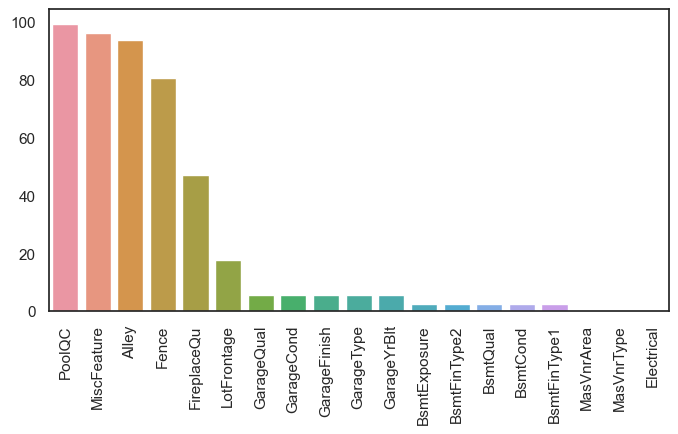

In [43]:
# La plupart des données manquantes concernent des éléments qui ne sont présents que dans peu d'habitations
# probablement information à conserver.
plt.figure(figsize=(8, 4), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan.values[:, 1])
plt.xticks(rotation=90)
plt.show()

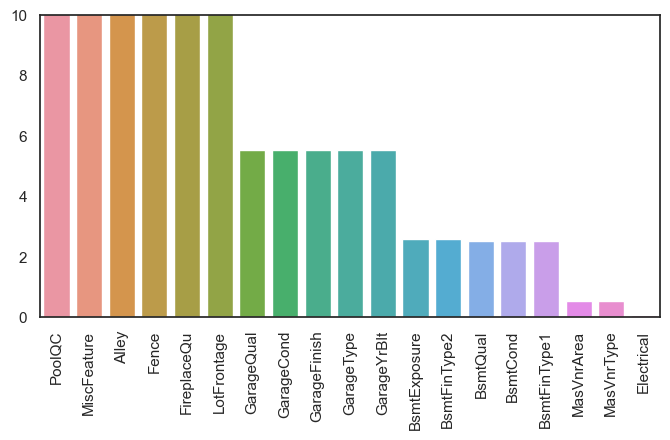

In [44]:
# Zoom sur les données avec très peu de données nulles (on fixe la ylim à 10%)
plt.figure(figsize=(8, 4), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan.values[:, 1])
plt.xticks(rotation=90)
plt.ylim(0, 10)  # pour zoomer sur les features qui ont moins de 1% de Nan
plt.show()

In [45]:
# correspond au type de revêtement des façades (brique, pierre, enduit...)
data[data["MasVnrType"].isnull()]
# à remplacer par "None" (c'est le "most frequent")

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  Log_SalePrice
234    235         60       RL          NaN     7851   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            5       2002          2002     Gable  CompShg     VinylSd     VinylSd        NaN         NaN        Gd        TA      PConc       Gd       TA           No          GLQ         625          Unf           0        235          860    GasA        Ex          Y      SBrkr       860      1100             0       1960             1             0         2         1             4             1          Gd             8        Typ           2          TA    BuiltIn       2002.0          Fin           2         440         TA         TA          Y         288           48              0          0            0         0    NaN   NaN         NaN        0       5    2010       WD        Normal     216500      12.285346
529    530         20       RL          NaN    32668   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm       Norm     1Fam     1Story            6            3       1957          1975       Hip  CompShg     Wd Sdng       Stone        NaN         NaN        Gd        TA      PConc       TA       TA           No          Rec        1219          Unf           0        816         2035    GasA        TA          Y      SBrkr      2515         0             0       2515             1             0         3         0             4             2          TA             9       Maj1           2          TA     Attchd       1975.0          RFn           2         484         TA         TA          Y           0            0            200          0            0         0    NaN   NaN         NaN        0       3    2007       WD        Alloca     200624      12.209188
650    651         60       FV         65.0     8125   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam     2Story            7            6       2007          2007     Gable  CompShg     CemntBd     CmentBd        NaN         NaN        Gd        TA      PConc       Gd       TA           No          Unf           0          Unf           0        813          813    GasA        Ex          Y      SBrkr       822       843             0       1665             0             0         2         1             3             1          Gd             7        Typ           0         NaN     Attchd       2007.0          RFn           2         562         TA         TA          Y           0            0              0          0            0         0    NaN   NaN         NaN        0       5    2008       WD        Normal     205950      12.235389
936    937         20       RL         67.0    10083   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      SawyerW       Norm       Norm     1Fam     1Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd        NaN         NaN        Gd        TA      PConc       Gd       TA           No  

In [46]:
data["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [47]:
data[data["PoolQC"].isnull()]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  Log_SalePrice
0        1         60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN    NaN         NaN        0       2    2008       WD        Normal     208500      12.247694
1        2         20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN    NaN         NaN        0       5    2007       WD        Normal     181500      12.109011
2        3         60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN    NaN         NaN        0       9    2008       WD        Normal     223500      12.317167
3        4         70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           

### Lot frontage
On peut le droper car il est très lié à LotArea.
Sinon piste d'amélioration : l'estimer en utilisant une autre variable comme LotArea

In [48]:
data[data["LotFrontage"].isnull()]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  Log_SalePrice
7        8         60       RL          NaN    10382   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story            7            6       1973          1973     Gable  CompShg     HdBoard     HdBoard      Stone       240.0        TA        TA     CBlock       Gd       TA           Mn          ALQ         859          BLQ          32        216         1107    GasA        Ex          Y      SBrkr      1107       983             0       2090             1             0         2         1             3             1          TA             7        Typ           2          TA     Attchd       1973.0          RFn           2         484         TA         TA          Y         235          204            228          0            0         0    NaN    NaN        Shed      350      11    2009       WD        Normal     200000      12.206073
12      13         20       RL          NaN    12968   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl       Sawyer       Norm       Norm     1Fam     1Story            5            6       1962          1962       Hip  CompShg     HdBoard     Plywood       None         0.0        TA        TA     CBlock       TA       TA           No          ALQ         737          Unf           0        175          912    GasA        TA          Y      SBrkr       912         0             0        912             1             0         1         0             2             1          TA             4        Typ           0         NaN     Detchd       1962.0          Unf           1         352         TA         TA          Y         140            0              0          0          176         0    NaN    NaN         NaN        0       9    2008       WD        Normal     144000      11.877569
14      15         20       RL          NaN    10920   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            5       1960          1960       Hip  CompShg     MetalSd     MetalSd    BrkFace       212.0        TA        TA     CBlock       TA       TA           No          BLQ         733          Unf           0        520         1253    GasA        TA          Y      SBrkr      1253         0             0       1253             1             0         1         1             2             1          TA             5        Typ           1          Fa     Attchd       1960.0          RFn           1         352         TA         TA          Y           0          213            176          0            0         0    NaN   GdWo         NaN        0       5    2008       WD        Normal     157000      11.964001
16      17         20       RL          NaN    11241   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            7       1970          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace       180.0        TA        TA     CBlock       TA       TA           

[[nan nan]
 [nan  1.]]


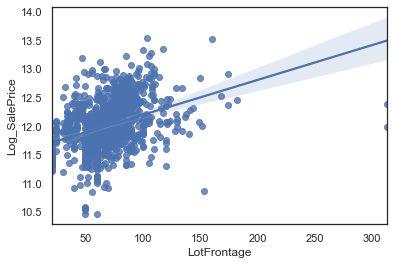

In [49]:
sns.regplot(x=data["LotFrontage"], y=data["Log_SalePrice"])
print(np.corrcoef(data["LotFrontage"], data["Log_SalePrice"]))

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

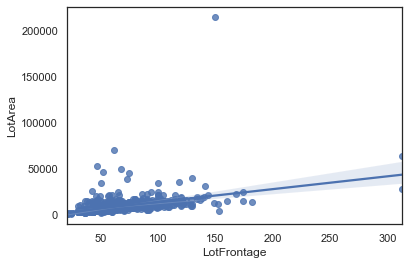

In [50]:
sns.regplot(x=data["LotFrontage"], y=data["LotArea"])
# seulement 0.25 avec SalePrice. Si LotFrontage est plus corrélé, avec

[[1.         0.25731989]
 [0.25731989 1.        ]]


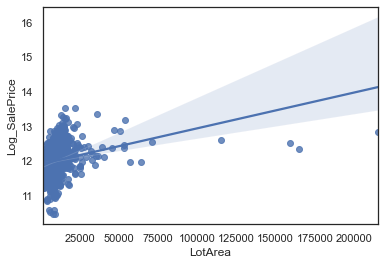

In [51]:
sns.regplot(x=data["LotArea"], y=data["Log_SalePrice"])
# seulement 0.25 avec SalePrice. Si LotFrontage est plus corrélé, avec
print(np.corrcoef(data["LotArea"], data["Log_SalePrice"]))

[[1.         0.35587847]
 [0.35587847 1.        ]]
[[1.         0.42609502]
 [0.42609502 1.        ]]


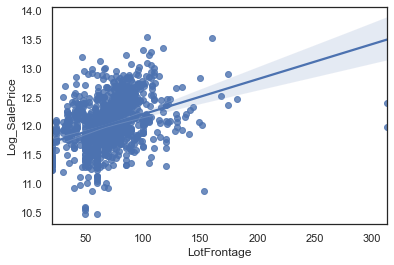

In [52]:
# on drope les NA sur LotFrontage pour voir si grosse corrélation avec la target
lot_front_dropped = data.dropna(subset=["LotFrontage"], axis=0)
sns.regplot(x=lot_front_dropped["LotFrontage"],
            y=lot_front_dropped["Log_SalePrice"])
# seulement 0.25 avec SalePrice. Si LotFrontage est plus corrélé, avec
print(
    np.corrcoef(lot_front_dropped["LotFrontage"],
                lot_front_dropped["Log_SalePrice"]))
print(
    np.corrcoef(lot_front_dropped["LotFrontage"],
                lot_front_dropped["LotArea"]))

### Pool
Seulement 7 piscines ! ==> Remplacer les NaN par "None". A noter : seul le "Excellent" est vraiment marqueur de valeur. Peut-être faire classe Excellent/Le reste (la présence d'une piscine est également prédictible
    

In [53]:
data["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [54]:
data[data["PoolQC"].isnull()]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  Log_SalePrice
0        1         60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN    NaN         NaN        0       2    2008       WD        Normal     208500      12.247694
1        2         20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN    NaN         NaN        0       5    2007       WD        Normal     181500      12.109011
2        3         60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN    NaN         NaN        0       9    2008       WD        Normal     223500      12.317167
3        4         70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           

In [55]:
data["PoolArea"].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

<AxesSubplot:xlabel='PoolQC', ylabel='Log_SalePrice'>

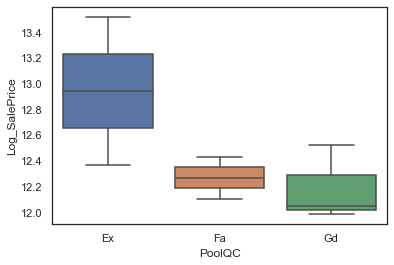

In [56]:
 sns.boxplot(x=data["PoolQC"], y=data["Log_SalePrice"])

### Garage
Les NaN correspondent à l'absence de garage. Remplacer les valeurs catégorielles par "None" et les numériques par 0.
Ou bien créer une colonne : garage Yes/No ?

In [57]:
garage_cols = [col for col in data.columns if "Garage" in col]
data[garage_cols][data["GarageYrBlt"].isnull()]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond
39          NaN          NaN          NaN           0           0        NaN        NaN
48          NaN          NaN          NaN           0           0        NaN        NaN
78          NaN          NaN          NaN           0           0        NaN        NaN
88          NaN          NaN          NaN           0           0        NaN        NaN
89          NaN          NaN          NaN           0           0        NaN        NaN
99          NaN          NaN          NaN           0           0        NaN        NaN
108         NaN          NaN          NaN           0           0        NaN        NaN
125         NaN          NaN          NaN           0           0        NaN        NaN
127         NaN          NaN          NaN           0           0        NaN        NaN
140         NaN          NaN          NaN           0           0        NaN        NaN
148         NaN          NaN          NaN           0           0        NaN        NaN
155         NaN          NaN          NaN           0           0        NaN        NaN
163         NaN          NaN          NaN           0           0        NaN        NaN
165         NaN          NaN          NaN           0           0        NaN        NaN
198         NaN          NaN          NaN           0           0        NaN        NaN
210         NaN          NaN          NaN           0           0        NaN        NaN
241         NaN          NaN          NaN           0           0        NaN        NaN
250         NaN          NaN          NaN           0           0        NaN        NaN
287         NaN          NaN          NaN           0           0        NaN        NaN
291         NaN          NaN          NaN           0           0        NaN        NaN
307         NaN          NaN          NaN           0           0        NaN        NaN
375         NaN          NaN          NaN           0           0        NaN        NaN
386         NaN          NaN          NaN           0           0        NaN        NaN
393         NaN          NaN          NaN           0           0        NaN        NaN
431         NaN          NaN          NaN           0           0        NaN        NaN
434         NaN          NaN          NaN           0           0        NaN        NaN
441         NaN          NaN          NaN           0           0        NaN        NaN
464         NaN          NaN          NaN           0           0        NaN        NaN
495         NaN          NaN          NaN           0           0        NaN        NaN
520         NaN          NaN          NaN           0           0        NaN        NaN
528         NaN          NaN          NaN           0           0        NaN        NaN
533         NaN          NaN          NaN           0           0        NaN        NaN
535         NaN          NaN          NaN           0           0        NaN        NaN
562         NaN          NaN          NaN           0           0        NaN        NaN
582         NaN          NaN          NaN           0           0        NaN        NaN
613         NaN          NaN          NaN           0           0        NaN        NaN
614         NaN          NaN          NaN           0           0        NaN        NaN
620         NaN          NaN          NaN           0           0        NaN        NaN
635         NaN          NaN          NaN           0           0        NaN        NaN
636         NaN          NaN          NaN           0           0        NaN        NaN
638         NaN          NaN          NaN           0           0        NaN        NaN
649         NaN          NaN          NaN           0           0        NaN        NaN
705         NaN          NaN          NaN           0           0        NaN        NaN
710         NaN          NaN          NaN           0           0        NaN        NaN
738         NaN          NaN          NaN    

In [58]:
data["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:xlabel='GarageQual', ylabel='Log_SalePrice'>

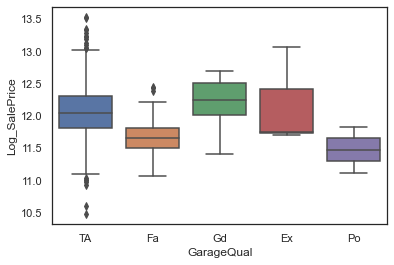

In [59]:
 sns.boxplot(x=data["GarageQual"], y=data["Log_SalePrice"])

[[1.         0.65088756]
 [0.65088756 1.        ]]


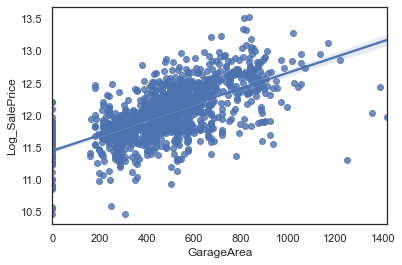

In [60]:
sns.regplot(x=data["GarageArea"], y=data["Log_SalePrice"])
print(np.corrcoef(data["GarageArea"], data["Log_SalePrice"]))

### Basement
Idem que garage. Les données NaN correspondent à des maisons n'ayant pas de basement.

In [61]:
bsmt_cols = [col for col in data.columns if "Bsmt" in col]
data[bsmt_cols][data["BsmtCond"].isnull()]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
17        NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
39        NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
90        NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
102       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
156       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
182       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
259       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
342       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
362       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
371       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
392       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
520       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
532       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
533       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
553       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
646       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
705       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
736       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
749       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
778       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
868       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
894       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
897       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
984       NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
1000      NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
1011      NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
1035      NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
1045      NaN      NaN          NaN          NaN           0          NaN           0          0            0             0             0
104

### Conclusions Imputation données manquantes :
- QUALITATIVES : 
    - [data["MasVnrType"] (8 nulles) ==> most frequent ("None")
    - data["Electrical"] (1 nulle) ==> à dropper (ou most_frequent)
    - data["PoolQC"] (seulement 7 non nulls !) ==> remplacer les NaN par "None". A noter : seul le "Excellent" est vraiment marqueur de valeur. Peut-être faire classe Excellent/Le reste (la présence d'une piscine est également prédictible
    
 **Garage / Bsmt / et celles qui suivent : remplacer par "None**
    <br>**MasVnrType et Electrical ==> remplacer par "most frequent"**
    - garage ==> fill with "None"
    - Idem pour ==> à remplacer par "None"
PoolQC	1453	99.520548
MiscFeature	1406	96.301370
Alley	1369	93.767123
Fence	1179	80.753425
FireplaceQu	690	47.260274
    
- QUANTITATIVES : 
    - [data["MasVnrType"] (8 nulles) ==> median (0.0) (ok aussi pour most frequent)
    - garage => seulement le YrBlt ==> ??
    
- Droper la colonne LotFrontage
        
        Qualitatives ==> remplacer toutes par constante "None"
        Quantitatives ==> remplacer par 0
       

In [62]:
percent_nan

missing_count  missing_percent
PoolQC                 1453        99.520548
MiscFeature            1406        96.301370
Alley                  1369        93.767123
Fence                  1179        80.753425
FireplaceQu             690        47.260274
LotFrontage             259        17.739726
GarageQual               81         5.547945
GarageCond               81         5.547945
GarageFinish             81         5.547945
GarageType               81         5.547945
GarageYrBlt              81         5.547945
BsmtExposure             38         2.602740
BsmtFinType2             38         2.602740
BsmtQual                 37         2.534247
BsmtCond                 37         2.534247
BsmtFinType1             37         2.534247
MasVnrArea                8         0.547945
MasVnrType                8         0.547945
Electrical                1         0.068493

## Variables qualitatives
- Faut-il en supprimer ?
- Comment les encoder ?
- En retravailler certaines ? Regrouper ? Catégoriser différemment ?
- Comment traiter les valeurs manquantes ?

In [63]:
# Liste des colonnes dans l'ordre :
cols = pd.DataFrame(data.columns)
cols

0
0              Id
1      MSSubClass
2        MSZoning
3     LotFrontage
4         LotArea
5          Street
6           Alley
7        LotShape
8     LandContour
9       Utilities
10      LotConfig
11      LandSlope
12   Neighborhood
13     Condition1
14     Condition2
15       BldgType
16     HouseStyle
17    OverallQual
18    OverallCond
19      YearBuilt
20   YearRemodAdd
21      RoofStyle
22       RoofMatl
23    Exterior1st
24    Exterior2nd
25     MasVnrType
26     MasVnrArea
27      ExterQual
28      ExterCond
29     Foundation
30       BsmtQual
31       BsmtCond
32   BsmtExposure
33   BsmtFinType1
34     BsmtFinSF1
35   BsmtFinType2
36     BsmtFinSF2
37      BsmtUnfSF
38    TotalBsmtSF
39        Heating
40      HeatingQC
41     CentralAir
42     Electrical
43       1stFlrSF
44       2ndFlrSF
45   LowQualFinSF
46      GrLivArea
47   BsmtFullBath
48   BsmtHalfBath
49       FullBath
50       HalfBath
51   BedroomAbvGr
52   KitchenAbvGr
53    KitchenQual
54   TotRmsAbvGrd
55     Functional
56     Fireplaces
57    FireplaceQu
58     GarageType
59    GarageYrBlt
60   GarageFinish
61     GarageCars
62     GarageArea
63     GarageQual
64     GarageCond
65     PavedDrive
66     WoodDeckSF
67    OpenPorchSF
68  EnclosedPorch
69      3SsnPorch
70    ScreenPorch
71       PoolArea
72         PoolQC
73          Fence
74    MiscFeature
75        MiscVal
76         MoSold
77         YrSold
78       SaleType
79  SaleCondition
80      SalePrice
81  Log_SalePrice

### Investigation :

<AxesSubplot:xlabel='MiscFeature', ylabel='Log_SalePrice'>

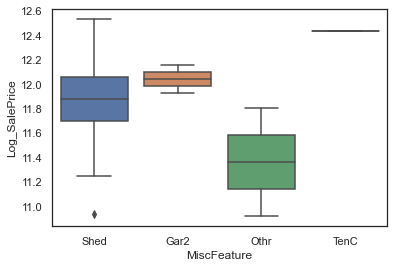

In [64]:
# a garder en one hot
features_to_investigate = ["MiscFeature", "MSSubClass", "Neighborhood", "Exterior1st", "Exterior2nd", "HouseStyle", "Utilities", "PavedDrive"]
sns.boxplot(x=data[features_to_investigate[0]], y=data["Log_SalePrice"])

<AxesSubplot:xlabel='MSSubClass', ylabel='Log_SalePrice'>

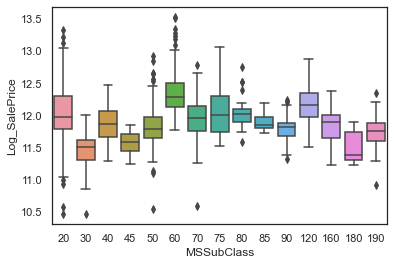

In [65]:
# à garder en OneHot 
sns.boxplot(x=data[features_to_investigate[1]], y=data["Log_SalePrice"])

MSSubClass: Identifies the type of dwelling involved in the sale. # A VOIR SI UTILE

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

<AxesSubplot:xlabel='Neighborhood', ylabel='Log_SalePrice'>

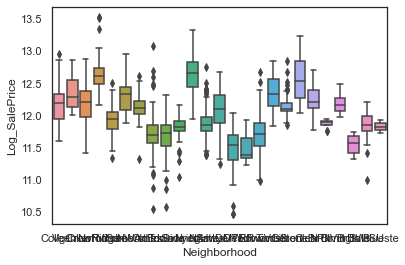

In [66]:
# dans un premier temps à droper
# idéalement à garder ==> mais trouver un moyen d'en réduire la dimension. Cluster ? Dendogramme ? PCA ? 
sns.boxplot(x=data[features_to_investigate[2]], y=data["Log_SalePrice"])

<AxesSubplot:xlabel='Exterior1st', ylabel='Log_SalePrice'>

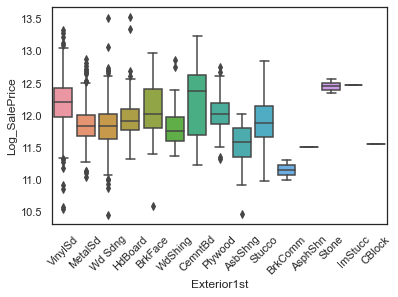

In [67]:
# one hot
plt.xticks(rotation=45)
sns.boxplot(x=data[features_to_investigate[3]], y=data["Log_SalePrice"])

<AxesSubplot:xlabel='Exterior2nd', ylabel='Log_SalePrice'>

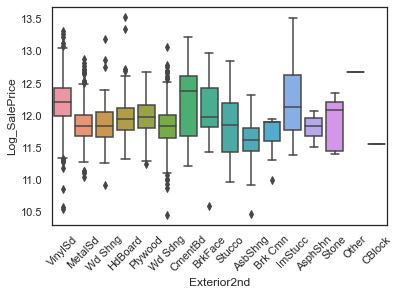

In [68]:
# one hot
plt.xticks(rotation=45)
sns.boxplot(x=data[features_to_investigate[4]], y=data["Log_SalePrice"])

<AxesSubplot:xlabel='HouseStyle', ylabel='Log_SalePrice'>

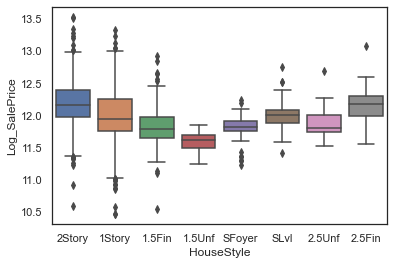

In [69]:
# one hot
sns.boxplot(x=data[features_to_investigate[5]], y=data["Log_SalePrice"])

<AxesSubplot:xlabel='Utilities', ylabel='Log_SalePrice'>

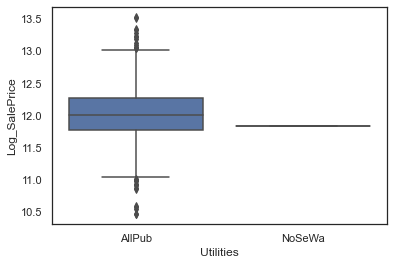

In [70]:
sns.boxplot(x=data[features_to_investigate[6]], y=data["Log_SalePrice"])

<AxesSubplot:xlabel='PavedDrive', ylabel='Log_SalePrice'>

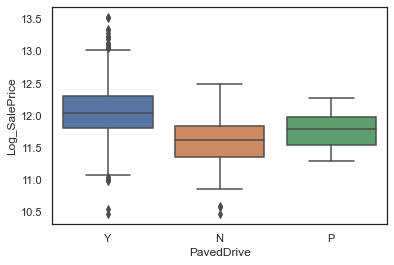

In [71]:
# à passer en ordinal
sns.boxplot(x=data[features_to_investigate[7]], y=data["Log_SalePrice"])

In [72]:
df_info(data[cat_cols])


        Longueur du dataset : 1460 enregistrements
        Nombre de colonnes : 44
        


type                                        Echantillon  % de valeurs nulles  Nbr L dupliquées  Nbr V unique
MSSubClass     object                               [60, 20, 60, 70, 60]                 0.00                21            15
MSZoning       object                     ['RL', 'RL', 'RL', 'RL', 'RL']                 0.00                21             5
Street         object           ['Pave', 'Pave', 'Pave', 'Pave', 'Pave']                 0.00                21             2
Alley          object                          [nan, nan, nan, nan, nan]                93.77                21             2
LotShape       object                ['Reg', 'Reg', 'IR1', 'IR1', 'IR1']                 0.00                21             4
LandContour    object                ['Lvl', 'Lvl', 'Lvl', 'Lvl', 'Lvl']                 0.00                21             4
Utilities      object  ['AllPub', 'AllPub', 'AllPub', 'AllPub', 'AllP...                 0.00                21             2
LotConfig      object       ['Inside', 'FR2', 'Inside', 'Corner', 'FR2']                 0.00                21             5
LandSlope      object                ['Gtl', 'Gtl', 'Gtl', 'Gtl', 'Gtl']                 0.00                21             3
Neighborhood   object  ['CollgCr', 'Veenker', 'CollgCr', 'Crawfor', '...                 0.00                21            25
Condition1     object          ['Norm', 'Feedr', 'Norm', 'Norm', 'Norm']                 0.00                21             9
Condition2     object           ['Norm', 'Norm', 'Norm', 'Norm', 'Norm']                 0.00                21             8
BldgType       object           ['1Fam', '1Fam', '1Fam', '1Fam', '1Fam']                 0.00                21             5
HouseStyle     object  ['2Story', '1Story', '2Story', '2Story', '2Sto...                 0.00                21             8
RoofStyle      object      ['Gable', 'Gable', 'Gable', 'Gable', 'Gable']                 0.00                21             6
RoofMatl       object  ['CompShg', 'CompShg', 'CompShg', 'CompShg', '...                 0.00                21             8
Exterior1st    object  ['VinylSd', 'MetalSd', 'VinylSd', 'Wd Sdng', '...                 0.00                21            15
Exterior2nd    object  ['VinylSd', 'MetalSd', 'VinylSd', 'Wd Shng', '...                 0.00                21            16
MasVnrType     object  ['BrkFace', 'None', 'BrkFace', 'None', 'BrkFace']                 0.55                21             4
ExterQual      object                     ['Gd', 'TA', 'Gd', 'TA', 'Gd']                 0.00                21             4
ExterCond      object                     ['TA', 'TA', 'TA', 'TA', 'TA']                 0.00                21             5
Foundation     object    ['PConc', 'CBlock', 'PConc', 'BrkTil', 'PConc']                 0.00                21             6
BsmtQual       object                     ['Gd', 'Gd', 'Gd', 'TA', 'Gd']                 2.53                21             4
BsmtCond       object                     ['TA', 'TA', 'TA', 'Gd', 'TA']                 2.53                21             4
BsmtExposure   object                     ['No', 'Gd', 'Mn', 'No', 'Av']                 2.60                21             4
BsmtFinType1   object                ['GLQ', 'ALQ', 'GLQ', 'ALQ', 'GLQ']                 2.53                21             6
BsmtFinType2   object                ['Unf', 'Unf', 'Unf', 'Unf', 'Unf']                 2.60                21             6
Heating        object           ['GasA', 'GasA', 'GasA', 'GasA', 'GasA']                 0.00                21             6
HeatingQC      object                     ['Ex', 'Ex', 'Ex', 'Gd', 'Ex']                 0.00                21             5
CentralAir     object                          ['Y', 'Y', 'Y', 'Y', 'Y']                 0.00                21             2
Electrical     object      ['SBrkr', 'SBrkr', 'SBrkr', 'SBrkr', 'SBrkr']                 0.07                21

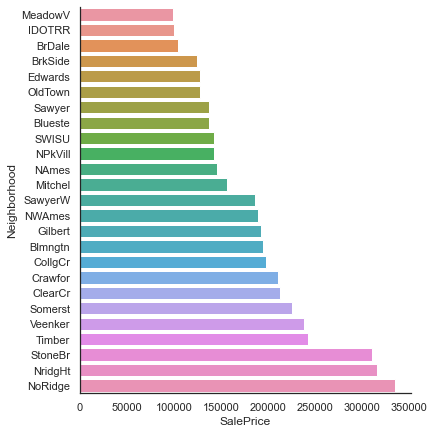

In [73]:
ordonned_neighborhood_df = data[["Neighborhood", "SalePrice"]].groupby(["Neighborhood"], as_index=False).mean()
ordonned_neighborhood_df = ordonned_neighborhood_df.sort_values(by="SalePrice")
sns.catplot(data=ordonned_neighborhood_df, kind="bar", y="Neighborhood", x="SalePrice", height=6)


In [74]:
ordonned_neighborhood = list(ordonned_neighborhood_df["Neighborhood"])

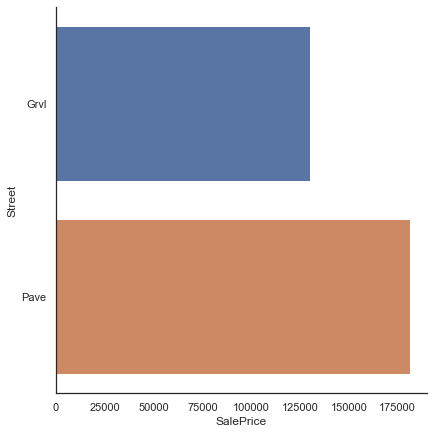

In [75]:
ordonned_street_df = data[["Street", "SalePrice"]].groupby(["Street"], as_index=False).mean()
ordonned_street_df = ordonned_street_df.sort_values(by="SalePrice")
sns.catplot(data=ordonned_street_df, kind="bar", y="Street", x="SalePrice", height=6)

### Variables à tester en combinaison NON FAIT

MiscFeature: Miscellaneous feature not covered in other categories ==> mettre présence / absence ? Ou bien la feature MiscValue suffit ?
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
Cumul des excellents : compter par ligne le nombre d'excellents.

In [77]:
#def excellent_counter(data, row):
   # counter = []
    #for col in data.columns:
       # if 
    

#data["CountExcellent"] = 

### Préprocessing Variables ordinales

In [78]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder


from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.compose import ColumnTransformer

# pour afficher les pipelines
from sklearn import set_config
set_config(display='diagram')

In [79]:
# liste des colonnes à encoder en ordinal :
ordinal_cols = ["LotShape", "Utilities", "LandSlope", "Neighborhood", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual",
               "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive",
               "PoolQC", "Fence"]


# listes ordonnées pour encodage ordinal : (idéalement il faudrait en faire une fonction)
ordinal_codes = [["IR3", "IR2", "IR1", "Reg"], 
        ["ELO", "NoSeWa", "NoSewr", "AllPub"], 
        ["Sev", "Mod", "Gtl"], 
        ordonned_neighborhood, 
        ["Po", "Fa", "TA", "Gd", "Ex"], 
        ["Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "No", "Mn", "Av", "Gd"], 
        ["Missing", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], 
        ["Missing", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], 
        ["Po", "Fa", "TA", "Gd", "Ex"],
        ["N", "Y"], 
        ["Po", "Fa", "TA", "Gd", "Ex"],
        #["Sal", "Sev", "Maj2", " Maj1", "Mod", "Min2", "Min1", "Typ"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "Unf", "RFn", "Fin"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["N", "P", "Y"], 
        ["Missing", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "MnWw", "GdWo", "MnPrv", "GdPrv"]]

          
# vérification de la cohérence des deux :
print(len(ordinal_cols))
print(len(ordinal_codes))

21
21


In [80]:
# imputer données manquantes :
ordinal_imputer = SimpleImputer(strategy="constant", fill_value="Missing")

# encoder feature catégorielles en ordinal :
ordinal_encoder = OrdinalEncoder(categories = ordinal_codes, handle_unknown = "use_encoded_value", unknown_value=-999)
                                 
# test des transformeurs :
X_ordinal_imputed = ordinal_imputer.fit_transform(X[ordinal_cols])
X_ordinal_encoded = ordinal_encoder.fit_transform(X_ordinal_imputed)
X_ordinal_encoded

# ORDINAL PIPELINE :
ordinal_pipe = Pipeline([("ordinal_imputer", ordinal_imputer), ("ordinal_encoder", ordinal_encoder)])

### Préprocessing Variables One Hot

In [81]:
# liste des colonnes concernées :
ohe_cols = [col for col in cat_cols if col not in ordinal_cols]
ohe_cols = pd.DataFrame(ohe_cols)
ohe_cols = list(ohe_cols[0])

# imputer données manquantes :
ohe_imputer = SimpleImputer(strategy="constant", fill_value="Missing")

# encoder features catégorielles en one hot :
ohe_encoder = OneHotEncoder(handle_unknown="ignore")

# test des transformeurs :
X_ohe_imputed = ohe_imputer.fit_transform(X[ohe_cols])
X_ohe_encoded = ohe_encoder.fit_transform(X_ohe_imputed)
X_ohe_encoded

# OHE PIPELINE :
ohe_pipe = Pipeline([("ohe_imputer", ohe_imputer), ("ohe_encoder", ohe_encoder)])

## Variables quantitatives
- Regarder les distributions de chacune (outliers ? à passer en log ?)
- Regarder les liens de chaque avec la variable à expliquer (là-encore approfondir les outliers et les transformations éventuelles)
- Faire une matrice de corrélation et regarder la colinéarité

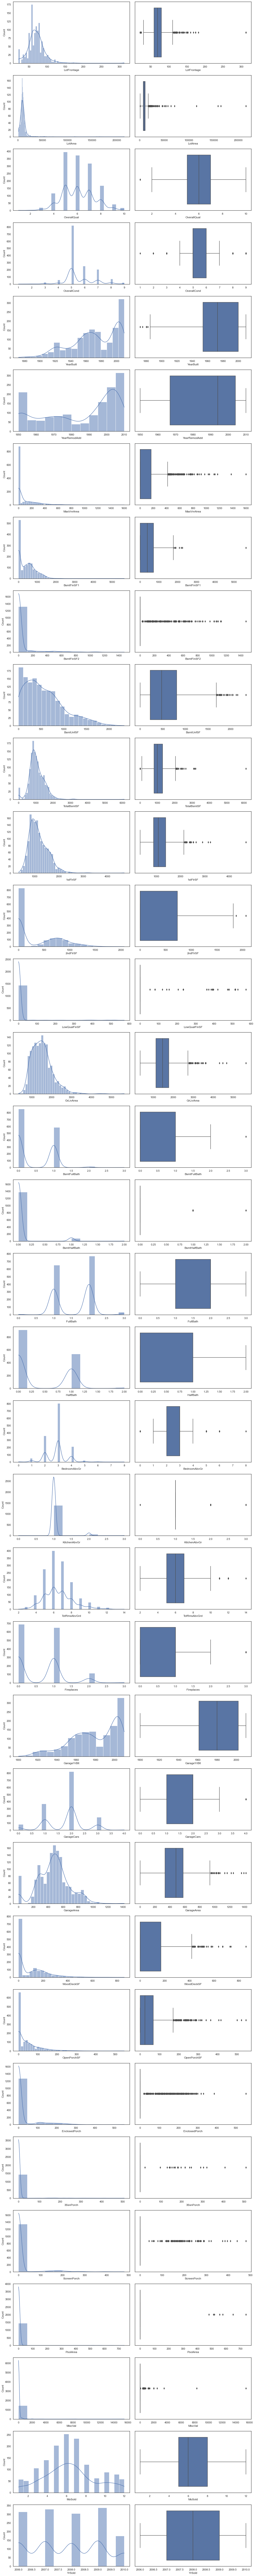

In [82]:
def plot_numeric_features(df, numerical_features_list):
    import seaborn as sns
    import matplotlib.pyplot as plt
    #sns.set()  # Setting seaborn as default style even if use only matplotlib
    #sns.set_palette("Paired")  # set color palette
    fig, axes = plt.subplots(nrows=len(numerical_features_list),
                             ncols=2,
                             figsize=(15, 150))
    for i, feature in enumerate(numerical_features_list):
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i, 0])
        sns.boxplot(data=df, x=feature, ax=axes[i, 1])
    plt.tight_layout()
    plt.show()


plot_numeric_features(data, num_cols)

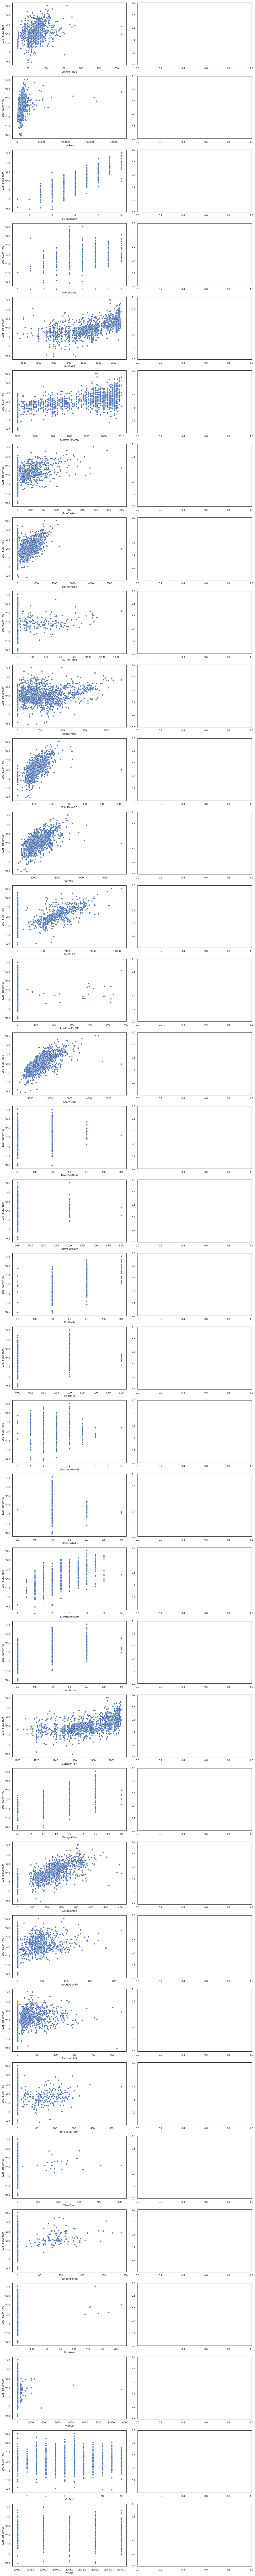

In [83]:
def plot_numeric_features(df, numerical_features_list):
    import seaborn as sns
    import matplotlib.pyplot as plt
    #sns.set()  # Setting seaborn as default style even if use only matplotlib
    #sns.set_palette("Paired")  # set color palette
    fig, axes = plt.subplots(nrows=len(numerical_features_list),
                             ncols=2,
                             figsize=(15, 150))
    for i, feature in enumerate(numerical_features_list):
        sns.scatterplot(data=df, x=feature, y="Log_SalePrice", ax=axes[i, 0])
        #sns.boxplot(data=df, x=feature, ax=axes[i, 1])
    plt.tight_layout()
    plt.show()

    
plot_numeric_features(data, num_cols)

In [84]:
first = data[data["TotalBsmtSF"] < 1000]
first
second = first[first["Log_SalePrice"] < 10.7]
second

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  Log_SalePrice
30    31         70  C (all)         50.0     8500   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr       Norm     1Fam     2Story            4            4       1920          1950   Gambrel  CompShg     BrkFace     BrkFace       None         0.0        TA        Fa     BrkTil       TA       TA           No          Unf           0          Unf           0        649          649    GasA        TA          N      SBrkr       649       668             0       1317             0             0         1         0             3             1          TA             6        Typ           0         NaN     Detchd       1920.0          Unf           1         250         TA         Fa          N           0           54            172          0            0         0    NaN  MnPrv         NaN        0       7    2008       WD        Normal      40000      10.596635
495  496         30  C (all)         60.0     7879   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm       Norm     1Fam     1Story            4            5       1920          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA     CBlock       TA       TA           No          Rec         495          Unf           0        225          720    GasA        TA          N      FuseA       720         0             0        720             0             0         1         0             2             1          TA             4        Typ           0         NaN        NaN          NaN          NaN           0           0        NaN        NaN          N           0          523            115          0            0         0    NaN   GdWo         NaN        0      11    2009       WD       Abnorml      34900      10.460242
533  534         20       RL         50.0     5000   Pave   NaN      Reg         Low    AllPub    Inside       Mod      BrkSide       Norm       Norm     1Fam     1Story            1            3       1946          1950     Gable  CompShg     VinylSd     VinylSd       None         0.0        Fa        Fa       Slab      NaN      NaN          NaN          NaN           0          NaN           0          0            0    GasA        Fa          N      FuseF       334         0             0        334             0             0         1         0             1             1          Fa             2        Typ           0         NaN        NaN          NaN          NaN           0           0        NaN        NaN          N           0            0              0          0            0         0    NaN    NaN         NaN        0       1    2007       WD        Normal      39300      10.578980
916  917         20  C (all)         50.0     9000   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm       Norm     1Fam     1Story            2            3       1949          1950     Gable  CompShg     AsbShng     AsbShng       None         0.0        TA        TA     CBlock       TA       TA           Av      

In [85]:
data[(data["YearBuilt"] < 1900) & (data["Log_SalePrice"] >12.1)]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  Log_SalePrice
185  186         75       RM         90.0    22950   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl      OldTown     Artery       Norm     1Fam     2.5Fin           10            9       1892          1993     Gable  WdShngl     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd     BrkTil       TA       TA           Mn          Unf           0          Unf           0       1107         1107    GasA        Ex          Y      SBrkr      1518      1518           572       3608             0             0         2         1             4             1          Ex            12        Typ           2          TA     Detchd       1993.0          Unf           3         840         Ex         TA          Y           0          260              0          0          410         0    NaN  GdPrv         NaN        0       6    2006       WD        Normal     475000      13.071070
304  305         75       RM         87.0    18386   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      OldTown       Norm       Norm     1Fam     2.5Fin            7            9       1880          2002     Gable  CompShg     CemntBd     CmentBd       None         0.0        TA        TA     BrkTil       TA       TA           No          Unf           0          Unf           0       1470         1470    GasA        Ex          Y      SBrkr      1675      1818             0       3493             0             0         3         0             3             1          Gd            10        Typ           1          Ex     Attchd       2003.0          Unf           3         870         TA         TA          Y         302            0              0          0            0         0    NaN    NaN         NaN        0       5    2008       WD        Normal     295000      12.594731
583  584         75       RM         75.0    13500   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      OldTown     Artery       PosA     1Fam     2.5Unf           10            9       1893          2000     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        Ex        Ex     BrkTil       TA       TA           No          Unf           0          Unf           0       1237         1237    GasA        Gd          Y      SBrkr      1521      1254             0       2775             0             0         3         1             3             1          Gd             9        Typ           1          Gd     Detchd       1988.0          Unf           2         880         Gd         TA          Y         105          502              0          0            0         0    NaN    NaN         NaN        0       7    2008       WD        Normal     325000      12.691580
747  748         70       RM         65.0    11700   Pave  Pave      IR1         Lvl    AllPub    Corner       Gtl      OldTown       Norm       Norm     1Fam     2Story            7            7       1880          2003   Mansard  CompShg      Stucco      Stucco       None         0.0        Gd        TA      Stone       TA       Fa           No      

### Suppression des outliers

In [86]:
# Fonction de préparation à appliquer avant le passage en pipeline : 
# to drop sur X : Lot Frontage, ID
# passer la variable MSSubClass en objet
# puis ensuite passer les résultats en exponentielle !

outliers_index = data[(data['LotArea'] > 100000) |
                (data["MasVnrArea"] > 1500) |
                (data['MiscVal']>6000) |
                (data['3SsnPorch']>350) |
                (data['EnclosedPorch']>400) |
                (data['OpenPorchSF']>450) |
                (data['1stFlrSF']>4000) |
                (data['TotalBsmtSF']>5000) |
                (data['GrLivArea']>4700)].index

data = data.drop(outliers_index)
data.shape

(1446, 82)

# Conception du Préprocessing

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV

## Setting max displayed rows to 500, in order to display the full output of any command
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [88]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.compose import ColumnTransformer

# pour afficher les pipelines
from sklearn import set_config
set_config(display='diagram')

## Fonction de premier nettoyage

In [89]:
def log_prep_train_data(df):
    data = df.copy()
    # passage en catégoriel d'une variable numérique
    data["MSSubClass"] = data["MSSubClass"].astype(dtype="object")
    # log sur la target
    data["Log_SalePrice"] = np.log(data["SalePrice"])
    # outliers
    outliers_index = data[(data['LotArea'] > 100000) |
                (data["MasVnrArea"] > 1500) |
                (data['MiscVal']>6000) |
                (data['3SsnPorch']>350) |
                (data['EnclosedPorch']>400) |
                (data['OpenPorchSF']>450) |
                (data['1stFlrSF']>4000) |
                (data['TotalBsmtSF']>5000) |
                (data['GrLivArea']>4700)].index
    data = data.drop(outliers_index)
    # séparation X et y. Drop de LotFrontage où trop de valeurs manquantes
    X = data.drop(["Id", "LotFrontage", "SalePrice", "Log_SalePrice"], axis=1)
    y = data["Log_SalePrice"]
    return X, y

In [90]:
def name_cols(X):
    ordinal_cols = ["LotShape", "Utilities", "LandSlope", "Neighborhood", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual",
               "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive",
               "PoolQC", "Fence"]
    cat_cols = [col for col in X.columns if X[col].dtype == "object"]
    ohe_cols = [col for col in cat_cols if col not in ordinal_cols]
    num_cols = [col for col in X.columns if X[col].dtype in ["int64", "float64"]]
    return ordinal_cols, cat_cols, ohe_cols, num_cols

In [91]:
def prep_test_data(df):
    data = df.copy()
    data["MSSubClass"] = data["MSSubClass"].astype(dtype="object")
    X = data.drop(["Id", "LotFrontage"], axis=1)
    return X

In [92]:
train = pd.read_csv("train.csv")

In [93]:
test = pd.read_csv("test.csv")

In [94]:
X_train, y_train = log_prep_train_data(train)
X_train.shape

(1446, 78)

In [96]:
X_test = prep_test_data(test)
X_test.shape

(1459, 78)

In [97]:
ordinal_cols, cat_cols, ohe_cols, num_cols = name_cols(X_test)
print(len(ordinal_cols) + len(ohe_cols))
print(len(cat_cols))
print(len(cat_cols) + len(num_cols))
print(len(ordinal_cols))

44
44
78
21


## Préparation des données

In [98]:
#test_data = pd.read_csv("test.csv")
data = pd.read_csv("train.csv")

In [99]:
X, y = log_prep_train_data(data)

In [100]:
ordinal_cols, cat_cols, ohe_cols, num_cols = name_cols(X)

## Préprocessing ordinal

In [184]:
# créer liste ordonnée des modalités de Neighborhood en fonction du prix de vente
ordonned_neighborhood_df = data[["Neighborhood", "SalePrice"]].groupby(["Neighborhood"], as_index=False).mean()
ordonned_neighborhood_df = ordonned_neighborhood_df.sort_values(by="SalePrice")

ordonned_neighborhood = list(ordonned_neighborhood_df["Neighborhood"])


# listes ordonnées pour encodage ordinal : 
ordinal_codes = [["IR3", "IR2", "IR1", "Reg"], 
        ["ELO", "NoSeWa", "NoSewr", "AllPub"], 
        ["Sev", "Mod", "Gtl"], 
        ordonned_neighborhood, 
        ["Po", "Fa", "TA", "Gd", "Ex"], 
        ["Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "No", "Mn", "Av", "Gd"], 
        ["Missing", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], 
        ["Missing", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], 
        ["Po", "Fa", "TA", "Gd", "Ex"],
        ["N", "Y"], 
        ["Po", "Fa", "TA", "Gd", "Ex"],
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "Unf", "RFn", "Fin"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "Po", "Fa", "TA", "Gd", "Ex"], 
        ["N", "P", "Y"], 
        ["Missing", "Fa", "TA", "Gd", "Ex"], 
        ["Missing", "MnWw", "GdWo", "MnPrv", "GdPrv"]]
len(ordinal_codes)


21

In [185]:
# imputer données manquantes :
ordinal_imputer = SimpleImputer(strategy="constant", fill_value="Missing")

# encoder feature catégorielles en ordinal :
ordinal_encoder = OrdinalEncoder(categories = ordinal_codes, handle_unknown = "use_encoded_value", unknown_value=-999)
                                 
# ORDINAL PIPELINE :
ordinal_pipe = Pipeline([("ordinal_imputer", ordinal_imputer), ("ordinal_encoder", ordinal_encoder)])

## Préprocessing One Hot

In [186]:
# imputer données manquantes :
ohe_imputer = SimpleImputer(strategy="constant", fill_value="Missing")

# encoder features catégorielles en one hot :
ohe_encoder = OneHotEncoder(handle_unknown="ignore")

# OHE PIPELINE :
ohe_pipe = Pipeline([("ohe_imputer", ohe_imputer), ("ohe_encoder", ohe_encoder)])

## Préprocessing Numérique

In [187]:
# imputer données manquantes :
num_imputer = SimpleImputer(strategy="constant", fill_value=0)

# scaler les variables numériques :
num_scaler = MinMaxScaler()

# NUMERICAL PIPELINE :
num_pipe = Pipeline([("num_imputer", num_imputer), ("num_scaler", num_scaler)])

## Pipeline de prépro global

In [188]:
prepro = ColumnTransformer([("ohe_pipe", ohe_pipe, ohe_cols), ("num_pipe", num_pipe, num_cols), ("ordinal_pipe", ordinal_pipe, ordinal_cols)])
prepro.get_params()

{'n_jobs': None,
 'remainder': 'drop',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('ohe_pipe',
   Pipeline(steps=[('ohe_imputer',
                    SimpleImputer(fill_value='Missing', strategy='constant')),
                   ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))]),
   ['MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LandContour',
    'LotConfig',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Foundation',
    'Heating',
    'Electrical',
    'Functional',
    'GarageType',
    'MiscFeature',
    'SaleType',
    'SaleCondition']),
  ('num_pipe',
   Pipeline(steps=[('num_imputer',
                    SimpleImputer(fill_value=0, strategy='constant')),
                   ('num_scaler', MinMaxScaler())]),
   ['LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',

In [189]:
ohe_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'LotConfig',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Modèles et pipes associés

In [107]:
from sklearn.linear_model import Ridge, Lasso, LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [108]:
model_ridge = Ridge()
pipe_ridge = Pipeline([("prepro", prepro), ("model_ridge", model_ridge)])

In [109]:
model_svr = SVR()
pipe_svr = Pipeline([("prepro", prepro), ("model_svr", model_svr)])

In [110]:
model_forest = RandomForestRegressor()
pipe_forest = Pipeline([("prepro", prepro), ("model_forest", model_forest)])

In [111]:
model_lassocv = LassoCV()
pipe_lassocv = Pipeline([("prepro", prepro), ("lasso_cv", model_lassocv)])

## Définition de la métrique
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [112]:
from sklearn.metrics import make_scorer, mean_squared_log_error
import math

In [113]:
def custom_score(y_true, y_pred):
    return math.sqrt(mean_squared_log_error(y_true, y_pred))

log_rmse = make_scorer(custom_score, greater_is_better=False)

# Fit et optimisation des modèles - Log_SalePrice

## Préparation des données

In [114]:
#test_data = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [115]:
X_train, y_train = log_prep_train_data(train)

In [116]:
ordinal_cols, cat_cols, ohe_cols, num_cols = name_cols(X_train)

In [117]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Modèle Ridge

In [118]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('ohe_pipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LandContour', 'LotConfig',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'Roof...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-999))]),
                                                  ['LotShape', 'Utilities',
                                                   'LandSlope', 'Neighborhood',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'CentralAir', 'KitchenQual',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('model_ridge', Ridge())])

In [119]:
cross_validate(pipe_ridge, X_train, y_train)

{'fit_time': array([0.08354616, 0.19634914, 0.13459778, 0.08925009, 0.1860199 ]),
 'score_time': array([0.03464794, 0.03681397, 0.03001094, 0.03886175, 0.02572608]),
 'test_score': array([0.91114905, 0.86328409, 0.89829154, 0.90823631, 0.91148664])}

In [120]:
cross_validate(pipe_ridge, X_train, y_train, scoring="neg_root_mean_squared_error")

{'fit_time': array([0.08346605, 0.21131301, 0.13533902, 0.11747098, 0.11727715]),
 'score_time': array([0.05860901, 0.04939604, 0.04479289, 0.04256797, 0.05237889]),
 'test_score': array([-0.11535955, -0.15321363, -0.13058881, -0.11493633, -0.11670488])}

## Modèle Lasso

In [121]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('ohe_pipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LandContour', 'LotConfig',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'Roof...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-999))]),
                                                  ['LotShape', 'Utilities',
                                                   'LandSlope', 'Neighborhood',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'CentralAir', 'KitchenQual',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('lasso_cv', LassoCV())])

In [122]:
cross_validate(pipe_lassocv, X_train, y_train)

{'fit_time': array([0.53315496, 0.60468197, 0.65590906, 0.40706396, 0.71698093]),
 'score_time': array([0.04986811, 0.03845096, 0.0340271 , 0.03598118, 0.02835774]),
 'test_score': array([0.90416157, 0.87272798, 0.89570256, 0.88750562, 0.89871563])}

In [123]:
cross_validate(pipe_lassocv, X_train, y_train, scoring="neg_root_mean_squared_error")

{'fit_time': array([0.43049598, 0.48760104, 0.56970382, 0.35318923, 0.34031105]),
 'score_time': array([0.03476024, 0.03008986, 0.02871108, 0.0259006 , 0.03243804]),
 'test_score': array([-0.11980981, -0.1478272 , -0.13224043, -0.12725864, -0.12484059])}

## Modèle SVR

In [124]:
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('ohe_pipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LandContour', 'LotConfig',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'Roof...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-999))]),
                                                  ['LotShape', 'Utilities',
                                                   'LandSlope', 'Neighborhood',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'CentralAir', 'KitchenQual',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('model_svr', SVR())])

In [125]:
cross_validate(pipe_svr, X_train, y_train)

{'fit_time': array([0.1873641 , 0.24035192, 0.33326793, 0.59079194, 0.25516605]),
 'score_time': array([0.06261969, 0.08562708, 0.31436324, 0.1383028 , 0.08846903]),
 'test_score': array([0.86961281, 0.86614664, 0.86859318, 0.87268781, 0.87745716])}

In [126]:
cross_validate(pipe_svr, X_train, y_train, scoring="neg_root_mean_squared_error")

{'fit_time': array([0.35418415, 0.22864008, 0.28755403, 0.2760551 , 0.27382517]),
 'score_time': array([0.17814589, 0.07721996, 0.08294916, 0.12684798, 0.08151603]),
 'test_score': array([-0.13974619, -0.15160116, -0.14843503, -0.13538074, -0.13731835])}

In [127]:
pipe_svr.get_params()

{'memory': None,
 'steps': [('prepro',
   ColumnTransformer(transformers=[('ohe_pipe',
                                    Pipeline(steps=[('ohe_imputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('ohe_encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['MSSubClass', 'MSZoning', 'Street', 'Alley',
                                     'LandContour', 'LotConfig', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exter...
                                                                                 'GdWo',
                                                   

## Random Forest

In [128]:
pipe_forest.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('ohe_pipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LandContour', 'LotConfig',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'Roof...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-999))]),
                                                  ['LotShape', 'Utilities',
                                                   'LandSlope', 'Neighborhood',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'CentralAir', 'KitchenQual',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('model_forest', RandomForestRegressor())])

In [129]:
cross_validate(pipe_forest, X_train, y_train)

{'fit_time': array([3.53211284, 2.94732189, 2.33837485, 2.38315272, 2.32931924]),
 'score_time': array([0.06721807, 0.03738213, 0.0342629 , 0.0344162 , 0.03161287]),
 'test_score': array([0.87961153, 0.86998744, 0.88532371, 0.87928515, 0.86518925])}

In [130]:
cross_validate(pipe_forest, X_train, y_train, scoring="neg_root_mean_squared_error")

{'fit_time': array([2.34600496, 2.16283989, 2.05930591, 2.06481719, 2.05558705]),
 'score_time': array([0.03116536, 0.02964592, 0.02902079, 0.0285809 , 0.03236985]),
 'test_score': array([-0.13373309, -0.14773293, -0.13743036, -0.13068907, -0.14498955])}

# Fit et optimisation des modèles - SalePrice
Moins concluant qu'avec les logs. Conserver les logs donc.

In [131]:
def prep_train_data(df):
    data = df.copy()
    # passage en catégoriel d'une variable numérique
    data["MSSubClass"] = data["MSSubClass"].astype(dtype="object")
    # log sur la target
    data["Log_SalePrice"] = np.log(data["SalePrice"])
    # outliers
    outliers_index = data[(data['LotArea'] > 100000) |
                (data["MasVnrArea"] > 1500) |
                (data['MiscVal']>6000) |
                (data['3SsnPorch']>350) |
                (data['EnclosedPorch']>400) |
                (data['OpenPorchSF']>450) |
                (data['1stFlrSF']>4000) |
                (data['TotalBsmtSF']>5000) |
                (data['GrLivArea']>4700)].index
    data = data.drop(outliers_index)
    # séparation X et y. Drop de LotFrontage où trop de valeurs manquantes
    X = data.drop(["Id", "LotFrontage", "SalePrice", "SalePrice"], axis=1)
    y = data["SalePrice"]
    return X, y

In [132]:
#test_data = pd.read_csv("test.csv")
data = pd.read_csv("train.csv")

In [133]:
X, y = prep_train_data(data)

In [134]:
ordinal_cols, cat_cols, ohe_cols, num_cols = name_cols(X)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [136]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1156, 79)
(290, 79)
(1156,)
(290,)


## Modèle Ridge

In [137]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('ohe_pipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LandContour', 'LotConfig',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'Roof...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-999))]),
                                                  ['LotShape', 'Utilities',
                                                   'LandSlope', 'Neighborhood',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'CentralAir', 'KitchenQual',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('model_ridge', Ridge())])

In [138]:
cross_validate(pipe_ridge, X_train, y_train)

{'fit_time': array([0.07320666, 0.09510136, 0.08274889, 0.06835604, 0.07648301]),
 'score_time': array([0.0217731 , 0.02685881, 0.02064681, 0.025877  , 0.03253198]),
 'test_score': array([0.86890363, 0.89924817, 0.84122248, 0.70526989, 0.8757418 ])}

In [139]:
cross_validate(pipe_ridge, X_train, y_train, scoring=log_rmse)

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "<ipython-input-113-647d8bce8f23>", line 2, in custom_score
    return math.sqrt(mean_squared_log_error(y_true, y_pred))
  File "/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py"

{'fit_time': array([0.06866193, 0.07234287, 0.09322691, 0.10242295, 0.10159087]),
 'score_time': array([0.03073001, 0.02912116, 0.04266405, 0.03751707, 0.05964017]),
 'test_score': array([-0.16394125, -0.16483527, -0.23842503, -0.17212111,         nan])}

## Modèle SVR

In [140]:
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('ohe_pipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LandContour', 'LotConfig',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'Roof...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-999))]),
                                                  ['LotShape', 'Utilities',
                                                   'LandSlope', 'Neighborhood',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'CentralAir', 'KitchenQual',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('model_svr', SVR())])

In [141]:
cross_validate(pipe_svr, X_train, y_train)

{'fit_time': array([0.30313706, 0.310256  , 0.31250405, 0.21458197, 0.17141914]),
 'score_time': array([0.12911987, 0.16408396, 0.13073397, 0.08141899, 0.07556987]),
 'test_score': array([-0.0560997 , -0.05205924, -0.01075836, -0.06184072, -0.13103659])}

In [142]:
cross_validate(pipe_svr, X_train, y_train,  scoring=log_rmse)

{'fit_time': array([0.29865122, 0.15612483, 0.16300893, 0.25539207, 0.14620519]),
 'score_time': array([0.19416809, 0.07004404, 0.06992507, 0.09980011, 0.06338692]),
 'test_score': array([-0.4226876 , -0.40867483, -0.39168068, -0.35894878, -0.39972869])}

In [143]:
pipe_svr.get_params()

{'memory': None,
 'steps': [('prepro',
   ColumnTransformer(transformers=[('ohe_pipe',
                                    Pipeline(steps=[('ohe_imputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('ohe_encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['MSSubClass', 'MSZoning', 'Street', 'Alley',
                                     'LandContour', 'LotConfig', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exter...
                                                                                 'GdWo',
                                                   

## Random Forest

In [144]:
pipe_forest.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('ohe_pipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LandContour', 'LotConfig',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'Roof...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-999))]),
                                                  ['LotShape', 'Utilities',
                                                   'LandSlope', 'Neighborhood',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'HeatingQC',
                                                   'CentralAir', 'KitchenQual',
                                                   'FireplaceQu',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive',
                                                   'PoolQC', 'Fence'])])),
                ('model_forest', RandomForestRegressor())])

In [145]:
cross_validate(pipe_forest, X_train, y_train)

{'fit_time': array([1.74658513, 1.76547384, 1.63814306, 1.67859292, 1.77487993]),
 'score_time': array([0.0277288 , 0.02744508, 0.02726197, 0.02748299, 0.02718496]),
 'test_score': array([0.86624561, 0.88008193, 0.91122133, 0.69421057, 0.88817465])}

In [146]:
cross_validate(pipe_forest, X_train, y_train, scoring=log_rmse)

{'fit_time': array([1.75689483, 1.6735642 , 1.65099216, 1.6649251 , 1.64718199]),
 'score_time': array([0.02768421, 0.02766585, 0.02915192, 0.02728987, 0.02844095]),
 'test_score': array([-0.15239497, -0.14351176, -0.14201337, -0.1504848 , -0.11571734])}

# Préparation de la première soumission Kaggle

Modèle choisi : LassoCV avec les logs

## Import et préparation du test set

In [197]:
test = pd.read_csv("test.csv")

In [198]:
X_test = prep_test_data(test)

In [199]:
ordinal_cols, cat_cols, ohe_cols, num_cols = name_cols(X_test)

In [200]:
print(len(ordinal_cols))
print(len(cat_cols))
print(len(ohe_cols))
print(len(num_cols))
print( (len(ordinal_cols)) + (len(ohe_cols)))
print((len(num_cols)) + (len(cat_cols)))

21
44
23
34
44
78


In [202]:
print(X_test.shape)

(1459, 78)


## Prédiction avec LassoCV

Attention : refaire tourner le ColumnTransformer avant de lancer ca car appelle une colonne de moins.

In [205]:
log_y_pred = pipe_lassocv.predict(X_test)
y_pred = np.exp(log_y_pred)
print(y_pred.mean())
print(y_pred.shape)

176386.11069645858
(1459,)


## Préparation du submission file

In [ ]:
ids = test_data["Id"]

In [ ]:
submite_df = pd.concat([pd.DataFrame(ids), pd.DataFrame(y_pred)], axis=1)

In [ ]:
submite_df.columns = ["Id", "SalePrice"]

In [ ]:
submite_df.to_csv("SubmiteKaggle1.csv", index=False)

# Feature selection

In [153]:
from sklearn.feature_selection import VarianceThreshold

## Réimport du Train_Set

In [154]:
train = pd.read_csv("train.csv")

In [155]:
test = pd.read_csv("test.csv")

In [156]:
X_train, y_train = log_prep_train_data(train)
X_train.shape

(1446, 78)

In [157]:
ordinal_cols, cat_cols, ohe_cols, num_cols = name_cols(X_test)
print(len(ordinal_cols) + len(ohe_cols))
print(len(cat_cols))
print(len(cat_cols) + len(num_cols))

44
44
78


## Passage du Train_Set en préprocessing

In [158]:
X_train_prepro = prepro.fit_transform(X_train)
print(X_train_prepro.shape)

(1446, 217)


## Variance Threshold
QUESTION ==> Le problème : soit on le fait sur X avant prépro et on zappe toutes les colonnes catégorielles. Soit on le fait après prépro mais ca supprime quasi toutes les variables (probablement pas adapté aux dummies ou aux données standardisées ?). De plus après prépro on n'a plus les noms de nos colonnes, comment faire alors ?

In [159]:
# calcul de la variance de chaque colonne
X_train_prepro.var(axis=0)

array([2.32369450e-01, 4.48148084e-02, 2.75859958e-03, 8.22988585e-03,
       8.85583161e-02, 1.63207417e-01, 3.97720425e-02, 9.58814223e-03,
       3.85017858e-02, 1.36399549e-02, 3.40257571e-02, 5.65460305e-02,
       4.16702536e-02, 6.86780339e-03, 1.96531090e-02, 6.18532739e-03,
       4.23010776e-02, 1.09425725e-02, 1.66436624e-01, 1.27063928e-01,
       3.44585818e-03, 3.44585818e-03, 3.27382831e-02, 5.77608091e-02,
       2.68973024e-02, 4.10384731e-02, 3.27382831e-02, 2.23007524e-02,
       8.96678776e-02, 1.46588385e-01, 5.89717617e-02, 3.14469830e-02,
       2.75859958e-03, 2.00103687e-01, 3.07998982e-02, 5.16486554e-02,
       1.17173526e-01, 5.50189486e-03, 1.29670441e-02, 7.54932288e-03,
       1.76573330e-02, 1.38121283e-03, 3.44585818e-03, 1.38121283e-03,
       4.13216026e-03, 8.90949230e-03, 1.38121283e-03, 6.91084673e-04,
       1.38121283e-03, 1.37501459e-01, 2.03164546e-02, 3.40257571e-02,
       2.88529047e-02, 7.26227166e-02, 9.29736058e-02, 9.58814223e-03,
      

In [160]:
variance_selector = VarianceThreshold(threshold=0.2)
X_variance = variance_selector.fit_transform(X_train_prepro)
print(X_variance.shape)
variance_selector.get_support() # renvoie en booléen indiquant les variables sélectionnés

(1446, 27)


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Select From Model

In [161]:
from sklearn.feature_selection import SelectFromModel


In [162]:
from sklearn.linear_model import SGDRegressor
selector1 = SelectFromModel(SGDRegressor(random_state=0), threshold = "mean")
X_selected = selector1.fit_transform(X_train_prepro, y_train)
print(X_selected.shape)
print(X_train_prepro.shape)

(1446, 76)
(1446, 217)


In [163]:
selector1.estimator_.coef_.shape # pour afficher les coeffs calculés par SGD Classifier

(217,)

In [164]:
from sklearn.ensemble import RandomForestRegressor
selector2 = SelectFromModel(RandomForestRegressor(), threshold = "median")
X_selected2 = selector2.fit_transform(X_train_prepro, y_train)
print(X_selected2.shape)
print(X_train_prepro.shape)

(1446, 109)
(1446, 217)


### Test sur Lasso

In [165]:
# Lasso AVANT sélection 
cross_validate(model_lassocv, X_train_prepro, y_train)

{'fit_time': array([0.29866099, 0.18642473, 0.16644311, 0.17097592, 0.16930795]),
 'score_time': array([0.00141406, 0.00068712, 0.00065589, 0.00078511, 0.00076699]),
 'test_score': array([0.9040556 , 0.87273409, 0.89464791, 0.88750554, 0.89885871])}

In [166]:
# Lasso APRES sélection via SGD > on est moins bon
cross_validate(model_lassocv, X_selected, y_train)

{'fit_time': array([0.24181604, 0.16105509, 0.11279607, 0.10523772, 0.12185597]),
 'score_time': array([0.00093699, 0.00060964, 0.00062609, 0.0007112 , 0.00062108]),
 'test_score': array([0.89405287, 0.84400002, 0.87555786, 0.88400677, 0.89425914])}

In [167]:
# Lasso APRES sélection via RandomForest ==> 
# on est quasi aussi bon qu'avant sélection et on a divisé par 2 les features
cross_validate(model_lassocv, X_selected2, y_train)

{'fit_time': array([0.20488405, 0.14774799, 0.1122942 , 0.11257911, 0.11499071]),
 'score_time': array([0.00106287, 0.00064206, 0.00061703, 0.00061893, 0.00060797]),
 'test_score': array([0.90389914, 0.87252927, 0.89450917, 0.88778894, 0.89890195])}

### Test sur Random Forest

In [168]:
# random forest AVANT sélection
cross_validate(model_forest, X_train_prepro, y_train)

{'fit_time': array([2.1319108 , 2.03406215, 2.07466221, 2.12607503, 2.01061487]),
 'score_time': array([0.01429033, 0.01464772, 0.01572514, 0.01375222, 0.01393533]),
 'test_score': array([0.88643682, 0.86963129, 0.8861638 , 0.88141784, 0.86889266])}

In [169]:
# random forest APRES sélection via SGD
cross_validate(model_forest, X_selected, y_train)

{'fit_time': array([1.03283024, 0.97872066, 0.96227503, 0.96708989, 1.13918805]),
 'score_time': array([0.01331568, 0.0137651 , 0.0134809 , 0.01614809, 0.01466012]),
 'test_score': array([0.86861314, 0.85923392, 0.85672066, 0.86295497, 0.86218585])}

In [170]:
# random forest APRES sélection via RandomForest
cross_validate(model_forest, X_selected2, y_train)

{'fit_time': array([1.96852612, 1.66408515, 1.66342282, 1.66846013, 1.65936899]),
 'score_time': array([0.0136199 , 0.01345086, 0.01398206, 0.01318812, 0.01439691]),
 'test_score': array([0.87877946, 0.87016066, 0.88775765, 0.87624442, 0.86938688])}

### Test sur SVM Régressor

In [171]:
# SVR AVANT sélection
cross_validate(model_svr, X_train_prepro, y_train)

{'fit_time': array([0.1058197 , 0.15218496, 0.10219097, 0.08704996, 0.09396291]),
 'score_time': array([0.04866624, 0.03605795, 0.03023815, 0.02902198, 0.02947378]),
 'test_score': array([0.86933561, 0.86259126, 0.86628112, 0.87271477, 0.87692114])}

In [172]:
# SVR APRES sélection via SGD
cross_validate(model_svr, X_selected, y_train)

{'fit_time': array([0.06293893, 0.08844686, 0.0621841 , 0.05357695, 0.055264  ]),
 'score_time': array([0.03593636, 0.03051209, 0.03189588, 0.03174281, 0.03288603]),
 'test_score': array([0.8858206 , 0.86022371, 0.86388417, 0.87285398, 0.88919332])}

In [173]:
# SVR APRES sélection via RandomForest ==> moins bon
cross_validate(model_svr, X_selected2, y_train)

{'fit_time': array([0.07327104, 0.10968804, 0.07037187, 0.06526899, 0.06332684]),
 'score_time': array([0.03794098, 0.04335594, 0.03405619, 0.03803301, 0.03450704]),
 'test_score': array([0.86723815, 0.86322542, 0.86556459, 0.87314799, 0.87831105])}

## Recursive Selection (from model)

In [174]:
from sklearn.feature_selection import RFE, RFECV

In [175]:
# step : détermine le nombre de features à éliminer à chaque itération (ici 1)
# mi_features_to_select : indique le nombre de variables qu'on veut a minima à la fin de notre sélection



selector3 = RFECV(SGDRegressor(), step=1, cv=3)
X_selected3 = selector3.fit_transform(X_train_prepro, y_train)
print(X_selected.shape)
print(X_train_prepro.shape)




(1446, 76)
(1446, 217)


In [176]:
print(selector3.ranking_)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  1  1  1  1  1  1
  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 15
  1  1  1  1  1  1  1  8  1  1  1  1  1 11  1  1  1  1  1  1  1  1  1  1
  1  6  1  1  1  1  1  1  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 14  1  1  1  1  5  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  9  1  1  1  1  1  1  1  1  1 13  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1  1  1  1  7
  1]


In [177]:
print(selector3.grid_scores_)

[-0.21163265  0.00166518  0.17230393  0.16123832  0.15777094  0.34173109
  0.33069932  0.36219169  0.41198457  0.41720619  0.42852918  0.44997422
  0.47110747  0.48415666  0.49509847  0.48536508  0.48628476  0.49024635
  0.50833501  0.51203506  0.53375815  0.53259515  0.54795551  0.55586519
  0.56653481  0.5761359   0.57544923  0.5692652   0.57458352  0.58433958
  0.57864233  0.57691737  0.57692537  0.56993346  0.57169491  0.58370155
  0.5760773   0.58531012  0.57944915  0.5818851   0.59037865  0.55804469
  0.575469    0.59280945  0.58987883  0.6040165   0.60627213  0.61094587
  0.6031853   0.60263482  0.60749527  0.61330973  0.59584921  0.61810308
  0.60539381  0.6083158   0.5995176   0.60468653  0.61181617  0.61661034
  0.61821329  0.62313331  0.61676765  0.61342074  0.61776225  0.61622711
  0.60521354  0.61845312  0.60153255  0.59331685  0.6259852   0.61363594
  0.62613082  0.62786917  0.61573032  0.61263387  0.63419688  0.61319044
  0.62468924  0.61710613  0.62218292  0.63237909  0

# Colinéarité

## Cluster map avec colinéarité 



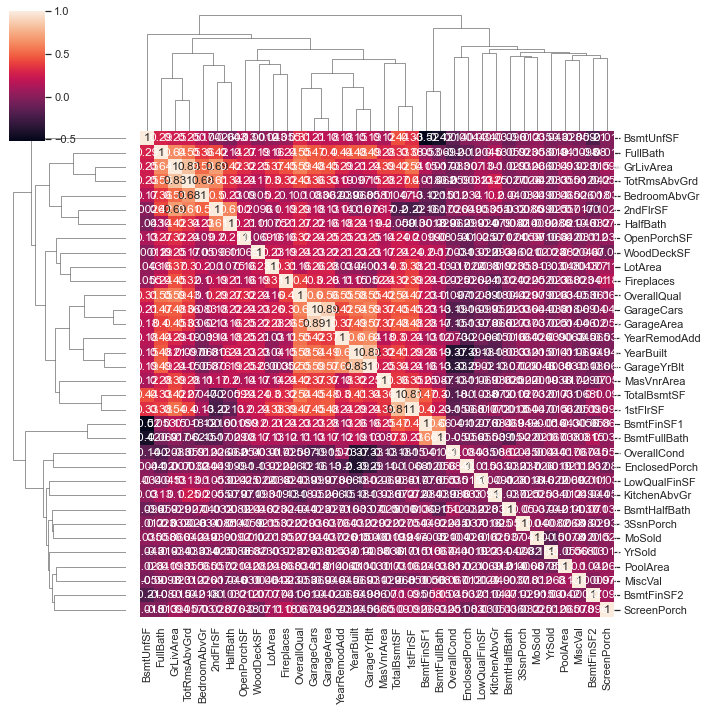

In [178]:
## ??? Comment on regarde ca quand on a 12000 variables ?
sns.clustermap(X_train.corr(),annot=True)

## Colinéarité avec StatsModel

In [181]:
#import statsmodels.api as sm 

In [182]:
# trouver les valeurs des paramètres qui maximisent la fonction de vraisemblance
#import statsmodels.formula.api as smf
#result = smf.logit("diagnosis_result ~ perimeter + area + compactness", data = df).fit()
#result.summary()

### On check la colinéarité

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('Supprime cette feature \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Garde ces variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [ ]:
X_train_prepro

In [ ]:
df_final = calculate_vif_(X_train_prepro, thresh=100)
#df_final = df_final.drop(['id'], axis=1)